In [1]:
#finc ships here: https://conwaylife.com/ref/lexicon/lex_1.htm

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

In [22]:
# constants

cells_width = 150
cells_height = 100
on_value = 234
off_value = 0

In [23]:
# initialize game level

game_level = np.random.choice(
    [on_value, off_value], 
    cells_height * cells_width, 
    p=[0.0, 1.0]).reshape([cells_height, cells_width])


In [24]:

def add_ship(ship_data, position):
    for i, line in enumerate(ship_data):
        for j, cell in enumerate(line):
            game_level[i + position[0]][j + position[1]] = ship_data[i][j]
            
def ship_character_to_value(input):
    if input == ".":
        return off_value
    if input == 'O':
        return on_value
    
def ship_to_ship_data(ship):
    lines = ship.splitlines()
    ship_data = np.zeros([len(lines), len(list(lines[0]))], dtype=np.uintc)
    for i, line in enumerate(lines):
        for j, char in enumerate(list(line)):
            ship_data[i][j] = ship_character_to_value(char)
    return ship_data

In [25]:
#this cell adds a ship to the game level

ship = """.................................O.
................O...............O.O
......O.O......O.....OO........O...
......O....O....O.OOOOOO....OO.....
......O.OOOOOOOO..........O..O.OOO.
.........O.....O.......OOOO....OOO.
....OO.................OOO.O.......
.O..OO.......OO........OO..........
.O..O..............................
O..................................
.O..O..............................
.O..OO.......OO........OO..........
....OO.................OOO.O.......
.........O.....O.......OOOO....OOO.
......O.OOOOOOOO..........O..O.OOO.
......O....O....O.OOOOOO....OO.....
......O.O......O.....OO........O...
................O...............O.O
.................................O."""

    
add_ship(ship_data=ship_to_ship_data(ship), position=[10,10])

<IPython.core.display.Javascript object>


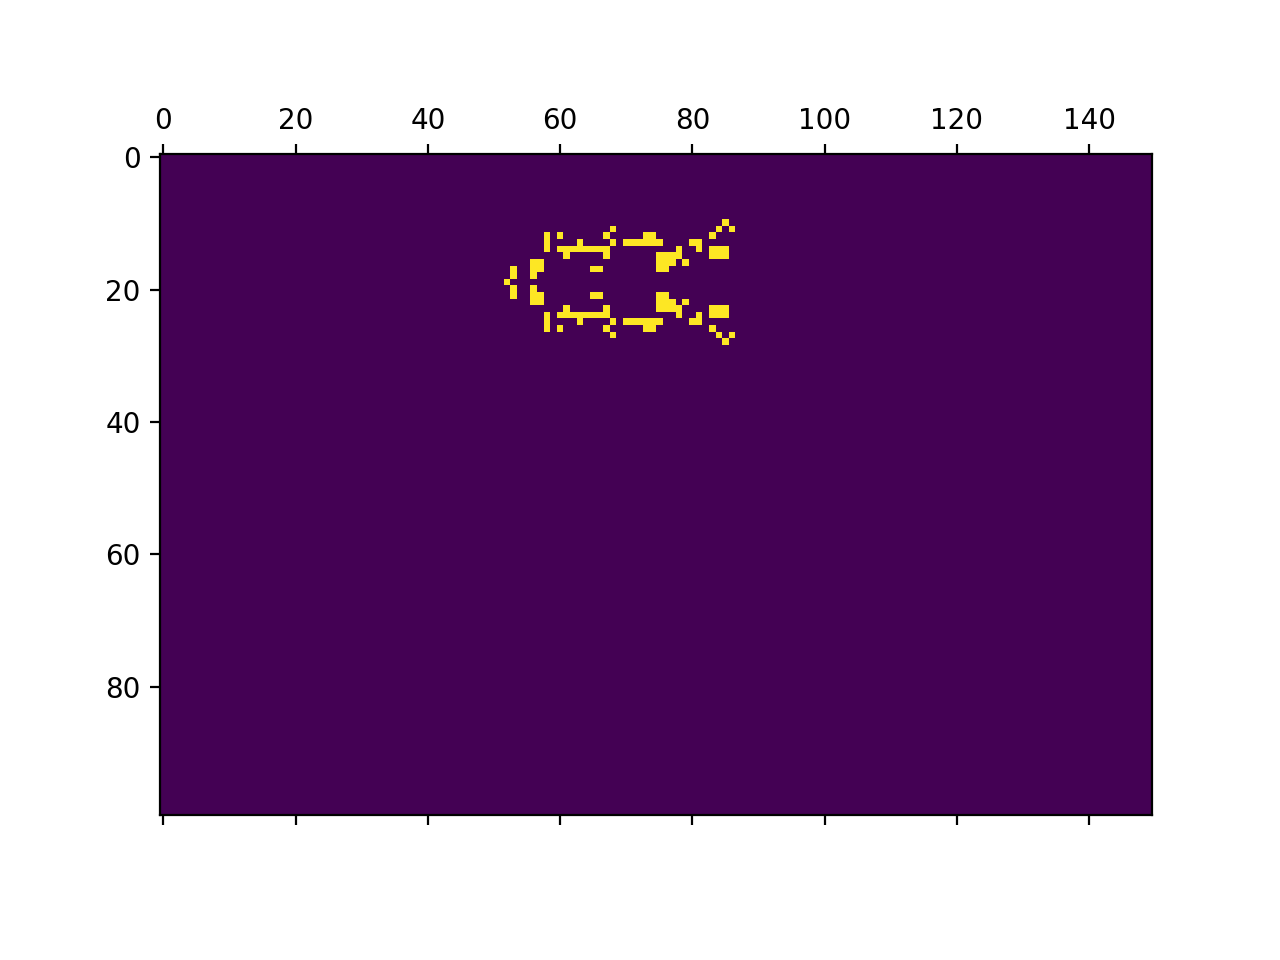

In [27]:
%matplotlib notebook
%matplotlib notebook

#from the web 
#inject values onto other variable names

def update(data):
    global game_level
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line 
    new_game_level = game_level.copy()
    for i in range(cells_height):
        for j in range(cells_width):
            # compute 8-neghbor sum 
            # using toroidal boundary conditions - x and y wrap around 
            # so that the simulaton takes place on a toroidal surface.
            total = (game_level[i, (j-1)%cells_width] + game_level[i, (j+1)%cells_width] + 
            game_level[(i-1)%cells_height, j] + game_level[(i+1)%cells_height, j] + 
            game_level[(i-1)%cells_height, (j-1)%cells_width] + game_level[(i-1)%cells_height, (j+1)%cells_width] + 
            game_level[(i+1)%cells_height, (j-1)%cells_width] + game_level[(i+1)%cells_height, (j+1)%cells_width])/on_value
            # apply Conway's rules
            if game_level[i, j]  == on_value:
                if (total < 2) or (total > 3):
                    new_game_level[i, j] = off_value
            else:
                if total == 3:
                    new_game_level[i, j] = on_value
    # update data
    mat.set_data(new_game_level)
    game_level = new_game_level
    return [mat]

# set up animation
fig, ax = plt.subplots()
mat = ax.matshow(game_level)
ani = animation.FuncAnimation(fig, update, interval=50,
                              save_count=50)
plt.show()